# Fair Coins and the Law of Large Numbers

The law of large numbers is fundamental to science and mathematics and has its roots deep within the modern constuction of experiments. In this notebook, we will explore a very simple example of the law of large numbers, namely, interpreting probabilities of statistically independent processes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import default_rng

### Implementation
Before getting into the examples, we need to write some code.

In [2]:
class Coin:
    """
    A simple class to describe a coin.
    
    Attributes
    ----------
    weight : float
            The weight of the coin in balace between heads and tails.
            This will correspond to the fraction of weight given to 
            a heads or tails outcome. If the number of 0.6 for example, 
            when a flip takes place, if the random number generated is 
            less than or equal to 0.6, the outcome is tails. This way we
            can also study the outcome of weighted coins.
    outcomes : list
            List of outcomes from the flips, this is updated iteratively 
            until the flush outcomes method is called. 1=heads, 0=tails.
            
    """
    
    def __init__(self, weight: float = 0.5):
        """
        Constructor for the Coin class
        
        Parameters
        ----------
        weight : float
                The weight of the coin in balace between heads and tails.
                This will correspond to the fraction of weight given to 
                a heads or tails outcome. If the number of 0.6 for example, 
                when a flip takes place, if the random number generated is 
                less than or equal to 0.6, the outcome is tails. This way we
                can also study the outcome of weighted coins.
        """
        
        self.weight = weight
        self.outcomes = np.array([])
    
    def flip(self, N: int = 1):
        """
        Flip the coin N times and record the outcomes.
        """
        rng = default_rng()
        vals = rng.integers(low=0, high=10, size=N)
        self.outcomes = np.append(self.outcomes, np.where(vals >= 10*self.weight, 0, 1))
    
    def flush_outcomes(self):
        """
        Clear the outcomes list. 
        """
        self.outcomes = []
        
    def n_heads(self, flips: int):
        """
        Count the number of heads.
        
        Parameters
        ----------
        flips : int
                n_heads after how many flips
        """
        return int(np.sum(self.outcomes[:flips]))
    
    def n_tails(self, flips: int):
        """
        Count the number of tails.
        
        Parameters
        ----------
        flips : int
                n_heads after how many flips
        """
        return int(len(self.outcomes[:flips]) - np.sum(self.outcomes[:flips]))
        

### Fair Coin

Here we can look at exactly how many coin flips we must perform in order to see convergence in the fraction of heads and tails.

In [3]:
coin = Coin()

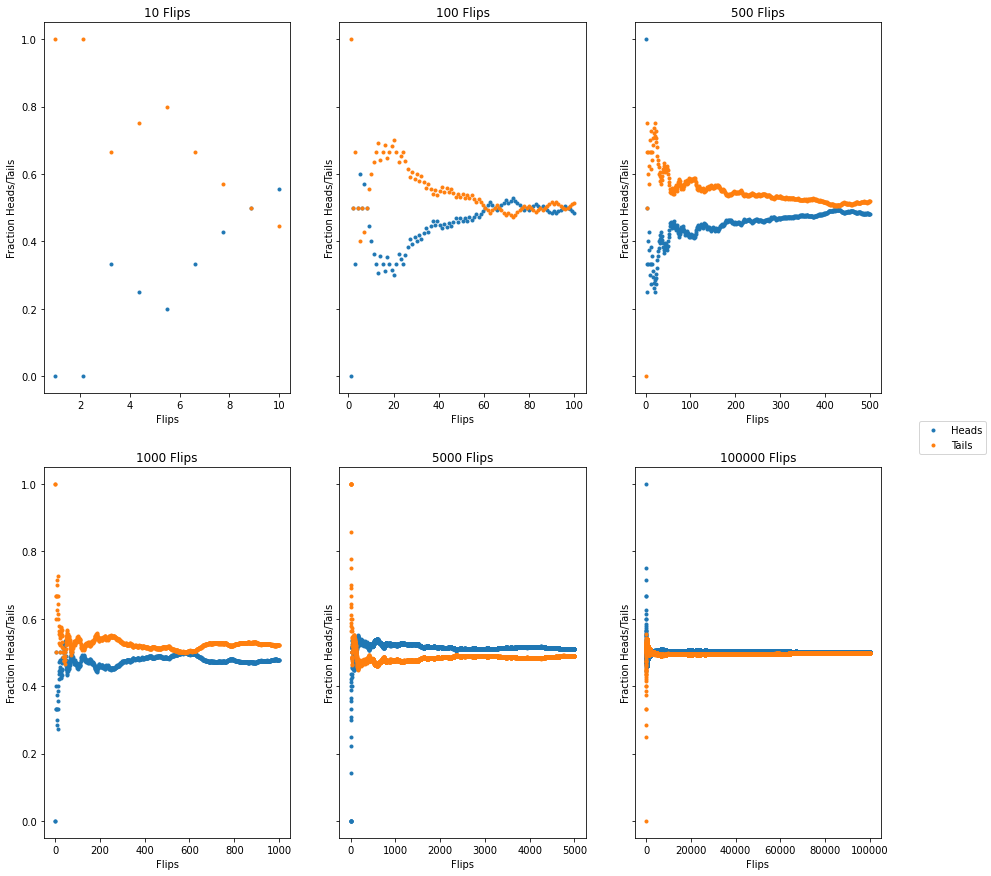

In [4]:
fig, axs = plt.subplots(2, 3, sharex=False, sharey=True, figsize=(15,15))
for i, N in enumerate([10, 100, 500, 1000, 5000, 100000]):
    if i < 3:
        j = 0
    else:
        j = 1
    coin.flip(N)
    heads = [coin.n_heads(i) for i in range(1, N)]
    tails = [coin.n_tails(i) for i in range(1, N)]
    axs[j, i - j*3].plot(np.linspace(1, N, N-1), 
                         np.array(heads)/np.array([i for i in range(1, N)]), 
                         '.', label='Heads')
    axs[j, i - j*3].plot(np.linspace(1, N, N-1), 
                         np.array(tails)/np.array([i for i in range(1, N)]), 
                         '.', label='Tails')
    axs[j, i - j*3].set_title(f"{N} Flips")
    axs[j, i - j*3].set_ylabel("Fraction Heads/Tails")
    axs[j, i - j*3].set_xlabel("Flips")
    coin.flush_outcomes()

fig.legend(['Heads', 'Tails'], loc='center right')
plt.show()

### Computing the Odds

Now we get to have a bit of fun! We can always ask the question, what is the probability of that a coin flip will come up heads? Well, the answer to that question for a fair coin is of course, 50%. However, how did you arrive at that answer? Also, what does that answer mean. By studying the above plots, you could argue that this isn't true at any given moment in time. Only after nearly 2000 coin fips does such an average seem to arise, so what is going on?. What you are grappling with is the law of large numbers. However, what is also does is bring up some interesing parallels between Bayesian and Frequentist reasoning. So why don't we keep digging and find out a bit more about the differences here and why they might be important. 

A frequentist will argue that based on the N coin flips, the odds of heads coming up is x%. Now a good scientist will put some restrictions on N to make sure that we have reached a large number regime, however, for the moment, let's just assume we are not good scientists and just look at how these odds would change with changing number of flips.

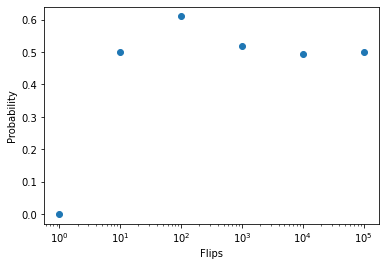

In [5]:
mean = np.zeros(6)

flips = [1, 10, 100, 1000, 10000, 100000]
coin.flip(100000)
for i, N in enumerate(flips):
    heads = coin.n_heads(N)
    mean[i] = heads/N


plt.semilogx(flips, mean, 'o')
plt.xlabel("Flips")
plt.ylabel("Probability")
plt.show()

Quite the motivation not to be lazy. If you were a devout frequentist, who also never read that part of your science books about the law of large numbers, you might have something to say after 1000 flips about the fairness of your coins. Of course, this is in practice not how a proper experiment should be performed. In reality, we should be using M different coins and flipping N times to judge what the real probability is for a coin. So let's do this then. We can simulate it simply by re-running the code above however this time with an addiional loop over ensembles.

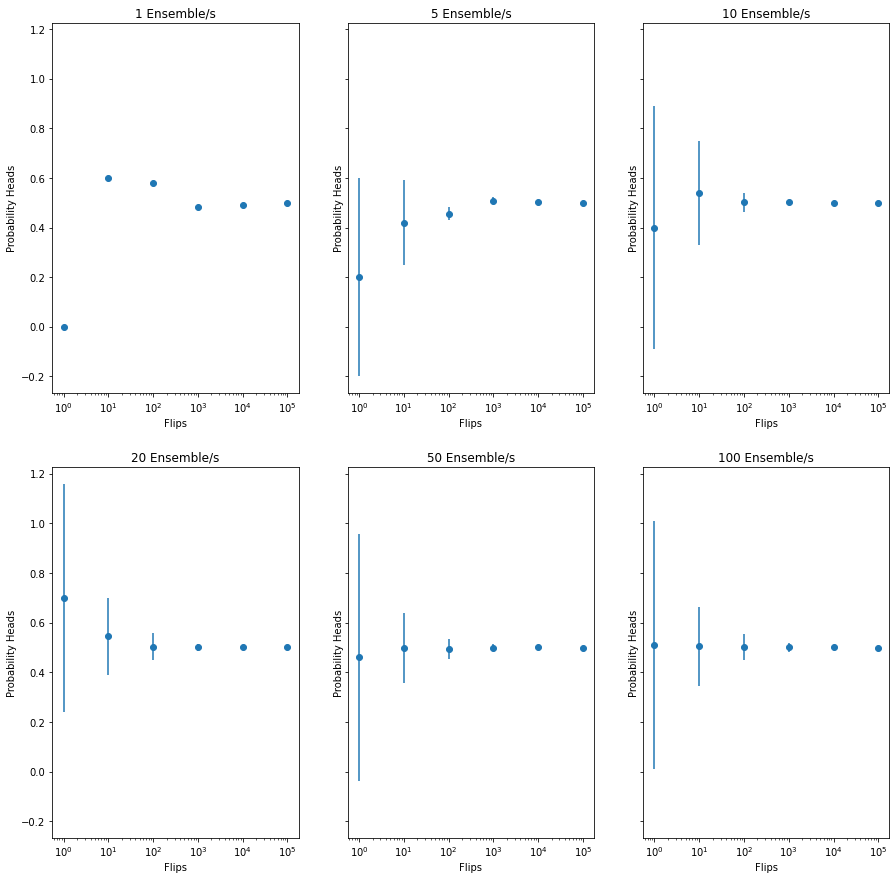

In [13]:
fig, axs = plt.subplots(2, 3, sharex=False, sharey=True, figsize=(15,15))
n_flips = 100000
flips = [1, 10, 100, 1000, 10000, 100000]
for k, ens in enumerate([1, 5, 10, 20, 50, 100]):
    if k < 3:
        m = 0
    else:
        m = 1
    
    outcomes = np.zeros((len(flips), ens))
    for j in range(ens):
        coin.flip(n_flips)
        for i, N in enumerate(flips):
            heads = coin.n_heads(N)
            outcomes[i, j] = heads / N
        coin.flush_outcomes()
        
    mean = np.mean(outcomes, axis=1)
    error = np.std(outcomes, axis=1)
    axs[m, k - m*3].set_xscale('log')
    axs[m, k - m*3].errorbar(flips, mean, yerr=error, fmt='o')
    axs[m, k - m*3].set_title(f"{ens} Ensemble/s")
    axs[m, k - m*3].set_ylabel("Probability Heads")
    axs[m, k - m*3].set_xlabel("Flips")

plt.show()

Now we are getting somewhere. If we repeat the experiemnt 5 times on 5 coins then immediately we start to see that from the start, the probablity is very close to 0.5. Repeat it on 100 ensembles and that 0.5 value is well within the realm of rational thought. So then why do we bother with all the flips if we can just use many ensembles? That can be answered very quickly by studing the uncertainty in the predictions. You can see that as the number of flips is increased, the uncertainty in the result converges to almost 0.

## Conclusion

In this notebook, we have looked into the law of large numbers as applied to a coin toss. We learned that, whilst the average of a distribution says one thing, individual measurements can always tell a different story. In the future we will look at more complex systems including correlated coins and dice throws.